### *Tarea M44 - Bryan Alberto Coronado García*

---

#### **Importación de un modelo con datos de RRHH (general_data.csv)**

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import os
 
 os.chdir('C:/Users/thehe/OneDrive/Escritorio/EBAC/Tareas/6. Machine Learning (M41 - )/M44 (Clasificación)')
 print(os.getcwd())
 
 df = pd.read_csv('general_data_.csv')
 df.head(3)

C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\6. Machine Learning (M41 - )\M44 (Clasificación)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


#### **EDA completo siguiendo los modelos anteriores**

In [2]:
print(df.shape)
df.info()# Se requiere transformación de objetos a categóricos

(4410, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesW

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T
# Existe una columna con datos faltantes a tratar, además de estandarización en la columna "MontlyIncome"

,count,mean,std,min,25%,50%,75%,max
Age,4410.00,36.92,9.13,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,4410.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,4410.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,4410.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeID,4410.00,2205.50,1273.20,1.00,1103.25,2205.50,3307.75,4410.00
JobLevel,4410.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,4410.00,65029.31,47068.89,10090.00,29110.00,49190.00,83800.00,199990.00
NumCompaniesWorked,4391.00,2.69,2.50,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,4410.00,15.21,3.66,11.00,12.00,14.00,18.00,25.00
StandardHours,4410.00,8.00,0.00,8.00,8.00,8.00,8.00,8.00


In [4]:
df.nunique()
# Importante eliminar las columasn "EmployeeCount", "StandardHours" y "Over18" ya que no aportan información relevante al modelo.

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [5]:
print(f'Existe una presencia de {df.isnull().sum().sum()} valores nulos')
print('Se requiere imputación de datos faltantes en la columna "NumCompaniesWorked"')

Existe una presencia de 28 valores nulos
Se requiere imputación de datos faltantes en la columna "NumCompaniesWorked"


#### **Feature engineering (Estandarización, eliminación, nuevas columnas)**

In [6]:
# Imputación de datos faltantes
# --------------------------------------------------------
#Se obtiene la media de las columnas con valores faltantes
mean_companies = int(df['NumCompaniesWorked'].mean())
mean_years = int(df['TotalWorkingYears'].mean())
# --------------------------------------------------------
# Se reemplazan los valores nulos por la media
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(mean_companies)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(mean_years)
# --------------------------------------------------------
# Verificación del dataframe actualizado
missing_values = df.isnull().sum()
print(f'Valores nulos despues de la imputación:\n{missing_values}')
# --------------------------------------------------------

Valores nulos despues de la imputación:
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [7]:
# Duplicación del DataFrame para evitar la modificación del original
df2 = df.copy()
# --------------------------------------------------------
# Eliminación de columnas no relevantes
df2.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeID'], inplace=True)
# --------------------------------------------------------
# Verificación de la eliminación
df2.nunique()
# --------------------------------------------------------

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [8]:
# Transformación de tipos de datos en la metadata
# --------------------------------------------------------
# Convertir columnas de tipo objeto a categórico
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = df2[col].astype('category')
# --------------------------------------------------------
# Cambio de variable 'NumCompaniesWorked' a tipo entero
df2['NumCompaniesWorked'] = df2['NumCompaniesWorked'].fillna(0).astype(np.int64)
# --------------------------------------------------------
# Verifcación de la transformación
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   category
 10  MaritalStatus            4410 non-null   category
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4410 non-null   int64   
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

In [9]:
# Verificación de balanceo de clases
# --------------------------------------------------------
print(df2['EducationField'].value_counts())
print('-' * 30 + '\n')
print(df2['BusinessTravel'].value_counts())
print('-' * 30 + '\n')
print(df2['Department'].value_counts())
print('-' * 30 + '\n')
print('\033[1m' + 'Sin necesidad de balancear clases debido a que no existe una diferencia significativa entre las variables.' + '\033[0m')
# --------------------------------------------------------


EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
------------------------------

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
------------------------------

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
------------------------------

Sin necesidad de balancear clases debido a que no existe una diferencia significativa entre las variables.


In [10]:
# Transformación de data a dummies
# --------------------------------------------------------
for col in df2.select_dtypes(include='category').columns:
    df2[col] = df2[col].cat.codes
# ----------------------------------------------------------
# Verificación del resultado
df.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1772,34,No,Travel_Rarely,Research & Development,20,3,Medical,1,1773,Female,...,3.00,Y,19,8,1,7.00,4,0,0,0
3724,44,No,Non-Travel,Research & Development,5,3,Life Sciences,1,3725,Male,...,3.00,Y,18,8,0,7.00,4,5,0,3
438,45,No,Non-Travel,Research & Development,8,1,Life Sciences,1,439,Male,...,1.00,Y,12,8,1,9.00,3,9,0,8
4015,46,Yes,Travel_Rarely,Research & Development,4,4,Medical,1,4016,Female,...,5.00,Y,25,8,1,14.00,1,8,0,7
947,32,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,948,Male,...,1.00,Y,19,8,1,1.00,2,1,0,0


In [11]:
# Estandarización de la columna "MontlyIncome"
# --------------------------------------------------------
from sklearn.preprocessing import StandardScaler
df2['MontlhyIncome'] = StandardScaler().fit_transform(df2[['MonthlyIncome']])
# --------------------------------------------------------
df2.drop('MonthlyIncome', axis=1, inplace=True)
# --------------------------------------------------------

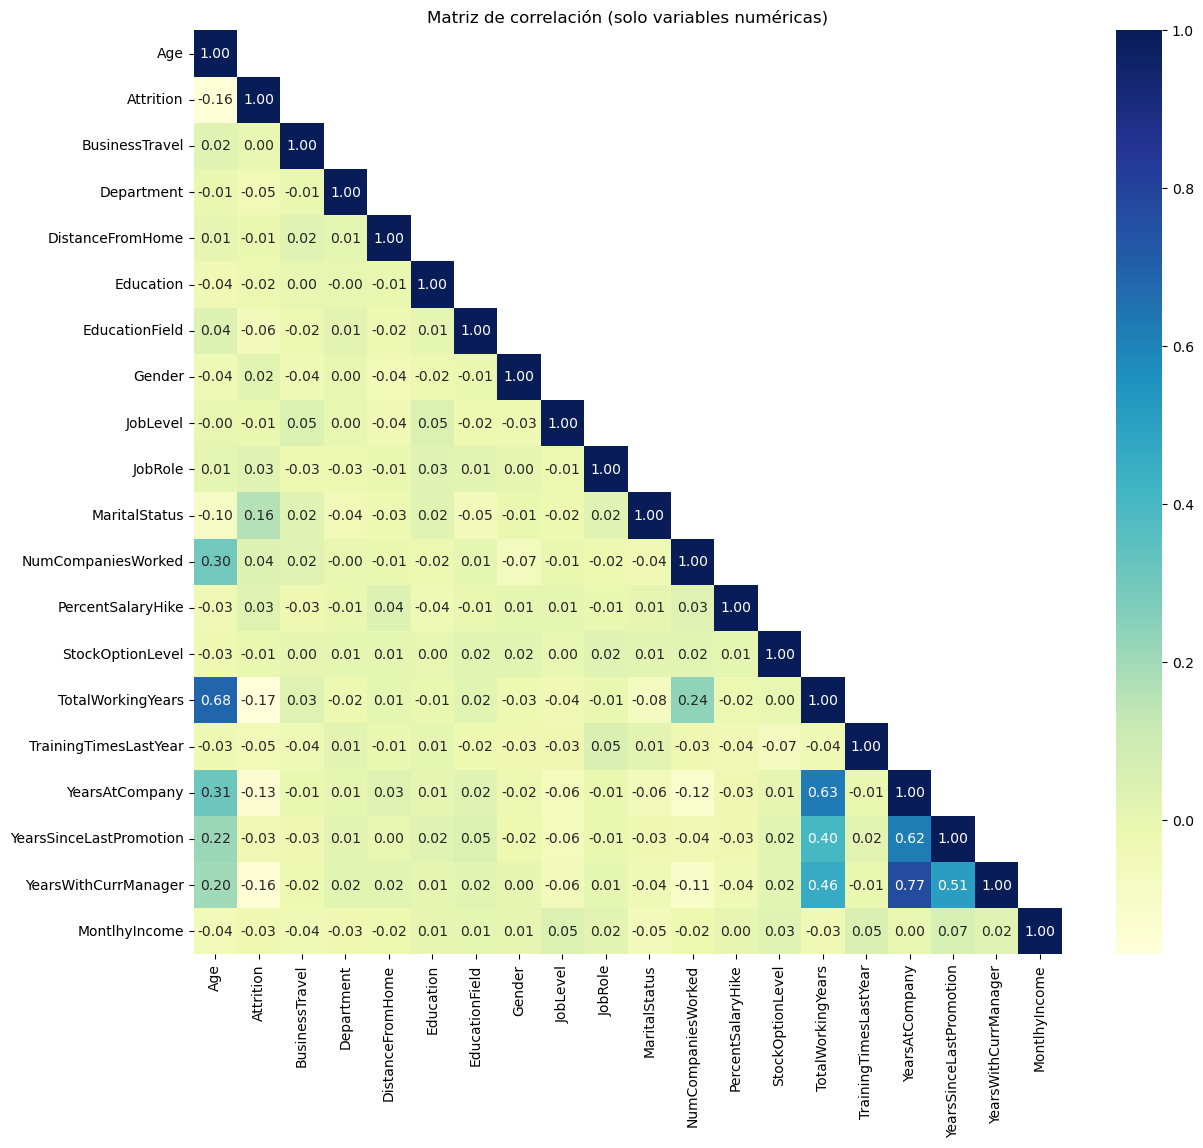

In [12]:
# Análisis para verificación de correlación
# --------------------------------------------------------
plt.figure(figsize=(14,12))
corr_df = df2.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape).astype(bool)))
sns.heatmap(df_lt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()
# --------------------------------------------------------
# Sin necesidad de eliminar variables debido a que no hay correlaciones altas que puedan afectar el modelo.

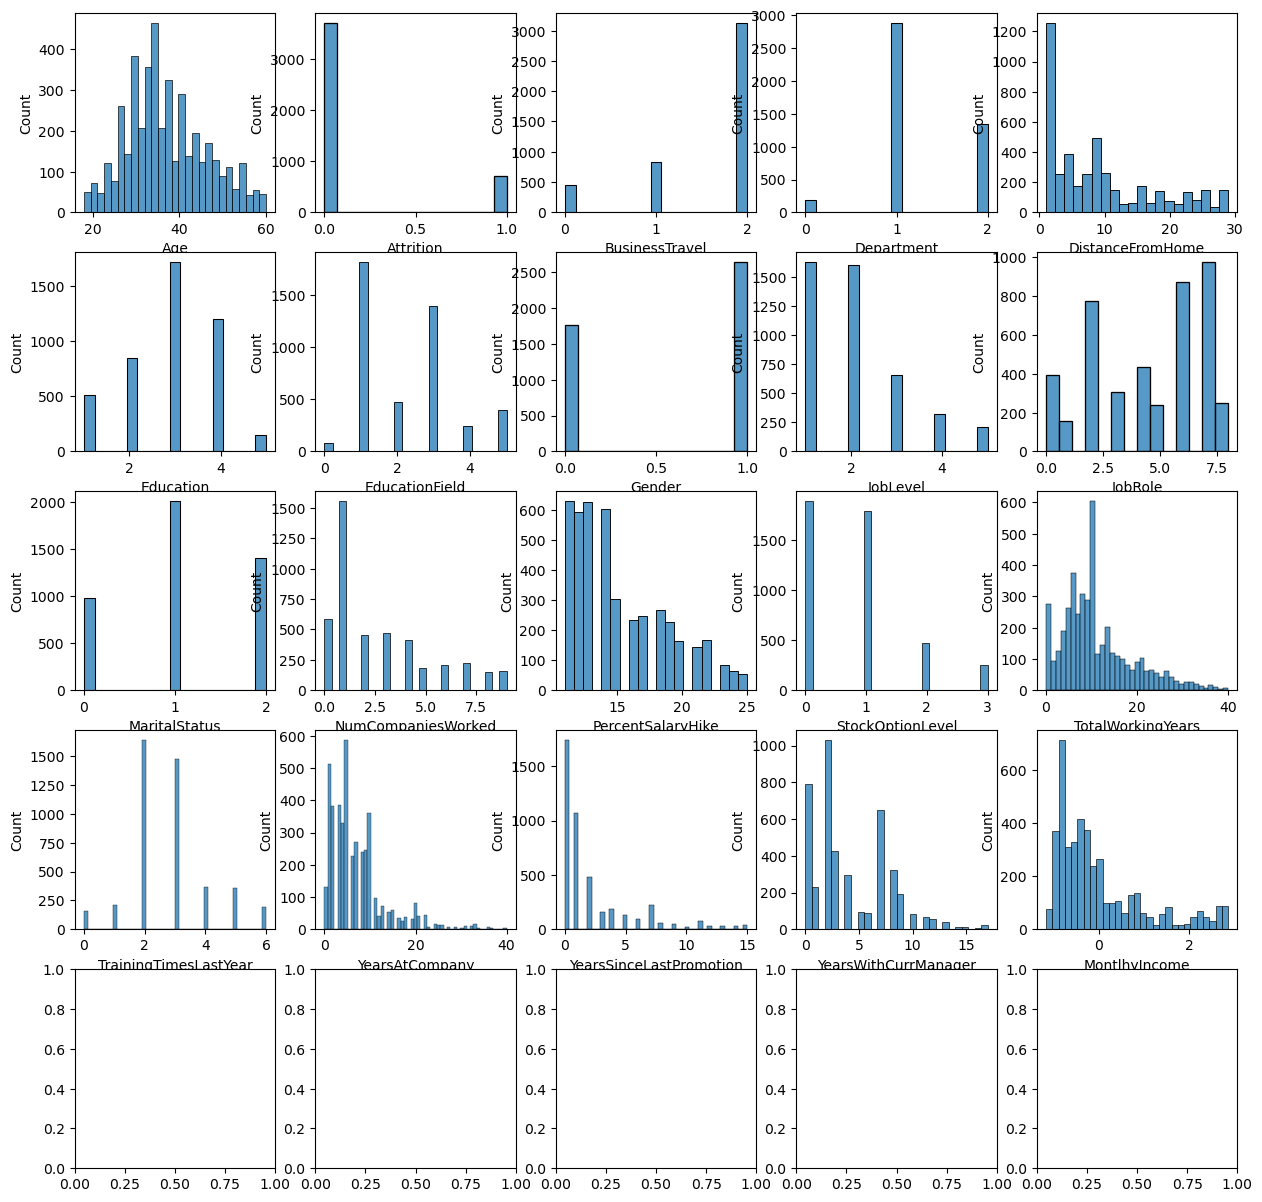

In [13]:
# Verificación de variables gráficas
# --------------------------------------------------------
# Columnas en una variable para su uso en subplots
col_nums = df2.select_dtypes(include=[np.number]).columns
# --------------------------------------------------------
# Generación de histogramas para cada variable numérica
fig, axes =  plt.subplots(nrows=5, ncols=5, figsize=(15,15))
for i, column in enumerate(col_nums):
    sns.histplot(df2[column], ax=axes[i//5, i%5], kde=False)
    # --------------------------------------------------------

#### **Aplicación de modelo de regresión logística a la variable Attrition**
----
#### **Entrenamiento, evaluación y predicción de los resultados del modelo**

In [14]:
from sklearn.model_selection import train_test_split
# --------------------------------------------------------
# División de los datos en conjunto de entrenamiento y prueba
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']
# --------------------------------------------------------
# Variables de prueba y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Aplicación del modelo de regresión logística
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --------------------------------------------------------

#### **Análisis de Sensibilidad e importancia de variables**

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
# --------------------------------------------------------
# Cálculo de las métricas del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
# --------------------------------------------------------
print(f'Accuracy: {accuracy:.2f}')
print('-' * 15)
print(f'Recall: {recall:.2f}')
print('-' * 15)
print(f'Precision: {precision:.2f}')
print('-' * 15)
print(f'F1 Score: {f1:.2f}')
print('-' * 15)
print(f'ROC AUC: {roc_auc:.2f}')
# --------------------------------------------------------


Accuracy: 0.63
---------------
Recall: 0.61
---------------
Precision: 0.25
---------------
F1 Score: 0.36
---------------
ROC AUC: 0.62


#### **Visualización de los resultados del modelo de clasificación**

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# --------------------------------------------------------
# Cálculo de las métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# --------------------------------------------------------
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
# --------------------------------------------------------

Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.61


In [18]:
# Coeficientes del modelo
# --------------------------------------------------------
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns
# --------------------------------------------------------
# Inclusión del intercepto en el DataFrame de coeficientes
coef_df['Intercept'] = model.intercept_
coef_df.T

,0
Age,-0.03
BusinessTravel,0.02
Department,-0.28
DistanceFromHome,0.00
Education,-0.04
EducationField,-0.08
Gender,0.12
JobLevel,-0.07
JobRole,0.05
MaritalStatus,0.62


In [19]:
b = X_test.copy()
b['Attrition (Real)'] = y_test
b['Attrition (Predict)'] = y_pred
b[['Attrition (Real)', 'Attrition (Predict)']].sample(15)
# --------------------------------------------------------

,Attrition (Real),Attrition (Predict)
3659,0,0
442,1,1
965,1,1
1213,0,0
3359,0,0
1885,0,1
2349,0,1
2712,0,1
1004,1,1
2929,0,0


#### **Matriz de Confusión y medidas del modelo**

Text(0.5, 1.0, 'Matriz de Confusión')

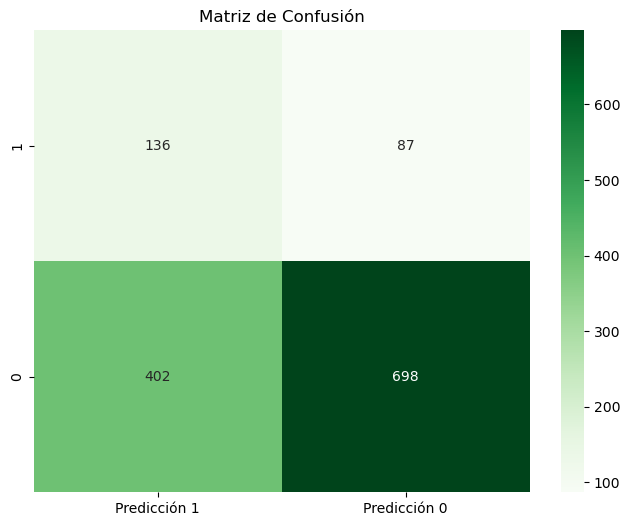

In [20]:
# Generación de la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index=['1', '0'], columns=['Predicción 1', 'Predicción 0'])
# --------------------------------------------------------
# Generación del gráfico para valoración
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens').set_title('Matriz de Confusión')